###**Livre**
+ https://github.com/PacktPublishing/Python-Feature-Engineering-Cookbook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**Observation de l'ensemble des données de seaborn**

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#**Charger le dataset "Titanic"**
+ Par défaut j'observe les 5 premières par défaut.

In [ ]:
df =sns.load_dataset('titanic')
df.head(n=3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#####**Vérifier les types**

In [ ]:
# print variable types
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
pd.value_counts(df.dtypes)

object      5
int64       4
float64     2
bool        2
category    1
category    1
dtype: int64

####**Inspection des valeurs uniques**

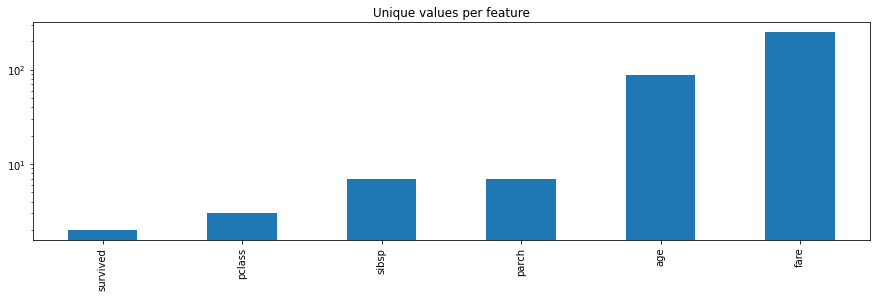

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");
   

####**Déterminons la cardinalité**

In [ ]:
nunique= df.nunique().sort_values().to_frame("unique_values")
nunique

,unique_values
survived,2
sex,2
adult_male,2
alive,2
alone,2
pclass,3
embarked,3
class,3
who,3
embark_town,3


####**Noms des colonnes**

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# inspect unique values - discrete variable
df['survived'].unique()# inspect unique values - discrete variab

array([0, 1])

In [ ]:
df['pclass'].unique()

array([3, 1, 2])

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

####**Plots - Visualizations**

###***Visualisations quanttives***

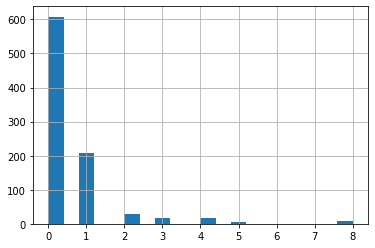

In [ ]:
# histograms of discrete variables often show
# a bar plot shape, instead of continuous intervals

df['sibsp'].hist(bins=20)

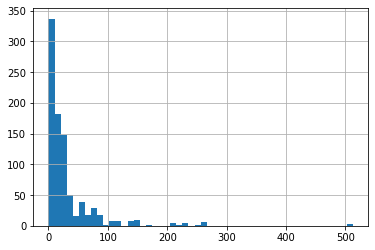

In [ ]:
# histogram of continuous variable
df['fare'].hist(bins=50)

###**Visualisation Catégoriel**

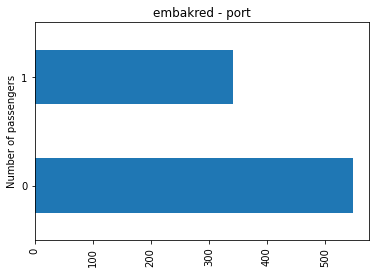

In [ ]:
# bar plots for categorical variables

df['survived'].value_counts().plot.barh()
plt.xticks(rotation=90)
plt.ylabel('Number of passengers')
plt.title('embakred - port')
plt.show()

####**Quantifying-missing-data**
methodologie:
  + Faire la distinction entre: .isna() et .isnull()

In [ ]:
# we can quantify the total number of missing values using
# the isnull() method plus the sum() method on the dataframe

df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# alternatively, we can use the mean() method after isnull()
# to visualise the percentage of missing values for each variable

df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

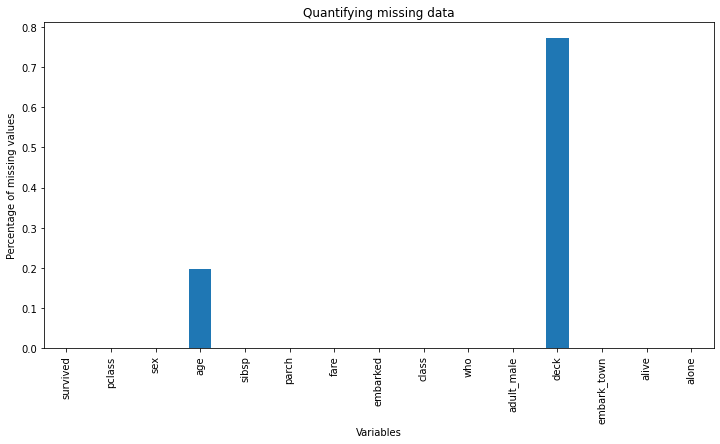

In [ ]:
# we can also plot the percentages of missing data utilising
# pandas plot.bar(), and add labels with matplotlib methods 
# as shown below

df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

####**Détermination des catégories rares**

In [ ]:
#cat = df.select_dtypes(include =["category", "object"])
cat.head(n=2)


In [ ]:
# trouvons la cardinalité de la variable
# le nombre de catégories uniques

df['fare'].nunique()

248

In [ ]:
# let's inspect the name of the categories

df['fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
df['fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

In [ ]:
# now let's calculate the frequency for each category
fare_counts=df["deck"].value_counts(normalize=True, ascending=False).to_frame("value_counts") #print(i, label_freq)

In [ ]:
fare_counts.head()

,value_counts
C,0.290640
B,0.231527
D,0.162562
E,0.157635
A,0.073892


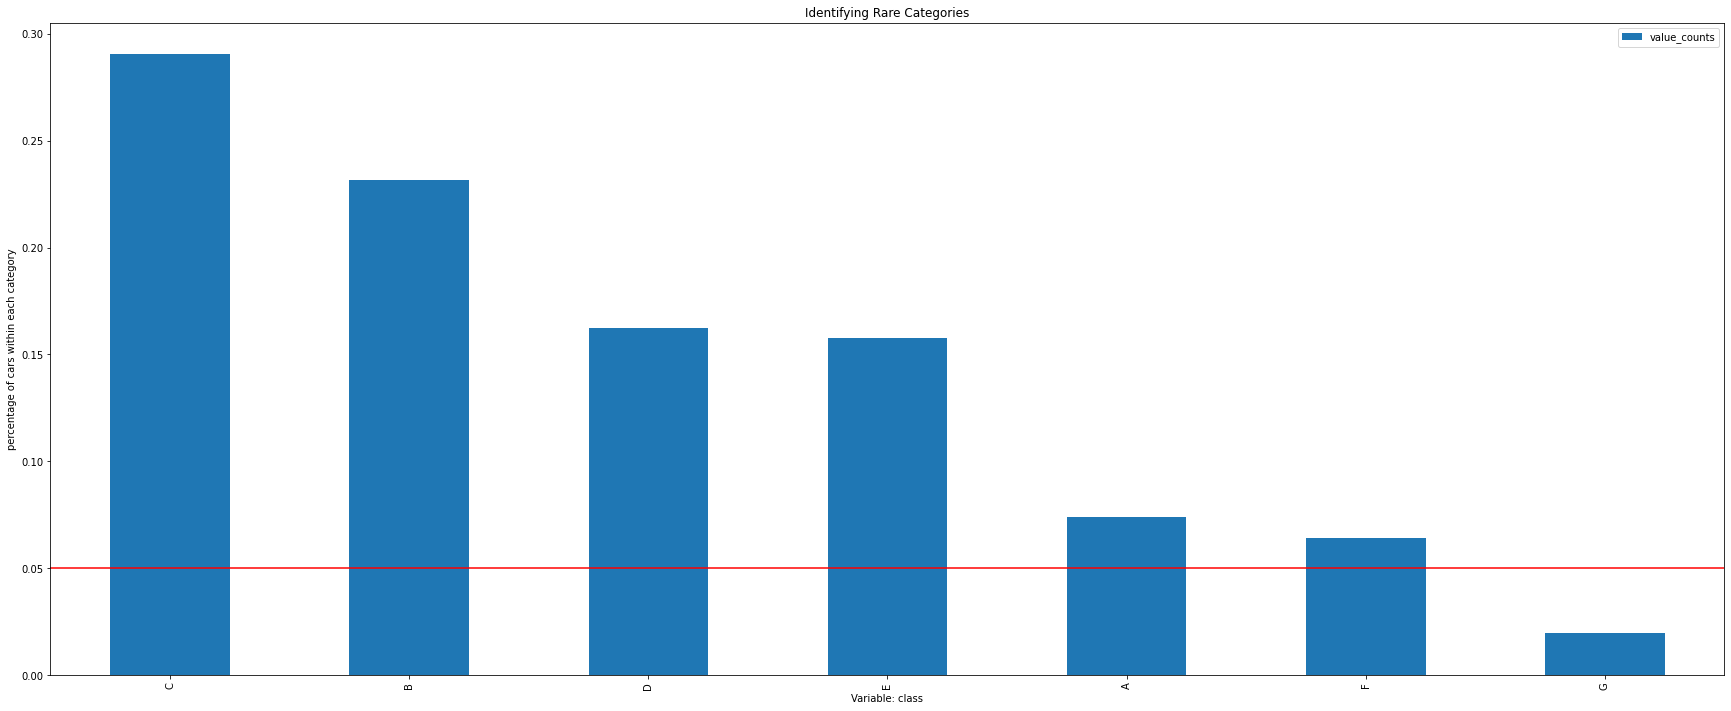

In [ ]:
# let's make plot with the category frequencies
fig = fare_counts.plot.bar(figsize=(30,12))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

###**Identifier une relation linéaire**

In [ ]:
# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
# charger les données sur les prix des maisons à Boston depuis scikit-learn

# voici comment nous chargeons le jeu de données de Boston depuis sklearn
boston_dataset = load_boston()
# créer un cadre de données avec les variables indépendantes
boston = pd.DataFrame(boston_dataset.data, columns= boston_dataset.feature_names)
# ajouter la cible
boston['MEDV'] = boston_dataset.target
boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Voici les informations sur le jeu de données du prince de la maison de Boston.
# se familiariser avec les variables avant de continuer avec 
# le cahier de notes

# L'objectif est de prédire la colonne "Valeur médiane des maisons".
# la colonne MEDV de ce jeu de données

# et nous avons des variables avec des caractéristiques sur
# les maisons et les quartiers

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

###**Le cas idéal**

In [ ]:
# Je vais créer un cadre de données avec la variable x qui
# suit une distribution normale et présente une
# relation linéaire avec y

# Cela fournira les graphiques attendus
# c'est-à-dire à quoi devraient ressembler les tracés si l'hypothèse linéaire
# l'hypothèse de linéarité est satisfaite
import numpy as np

np.random.seed(29) # pour la reproductibilité

n = 200 # dans le livre, nous passons directement 200 entre parenthèses, sans définir n
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 20.80000000000002, 'Variable indépendante')

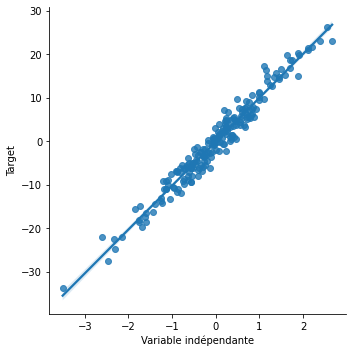

In [ ]:
# pour les données simulées

# Voici à quoi ressemble le nuage de points lorsque
# il existe une relation linéaire entre X et Y

sns.lmplot(x="x", y="y", data=data, order=1)
# L'ordre 1 indique que nous voulons que seaborn
# estime un modèle linéaire (la ligne dans le graphique ci-dessous)
# entre x et y

plt.ylabel('Target')
plt.xlabel('Variable indépendante')

###**Retour à la réalité**

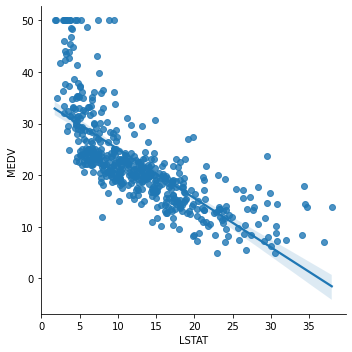

In [ ]:
# Maintenant, nous faisons un diagramme de dispersion pour les données de prix des maisons à Boston.
# l'ensemble de données sur le prix des maisons

# nous traçons la variable LAST (% de la population de statut inférieur)
# contre la cible MEDV (valeur médiane de la maison)

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

+ ***Bien qu'elle ne soit pas parfaite, la relation est assez linéaire.***

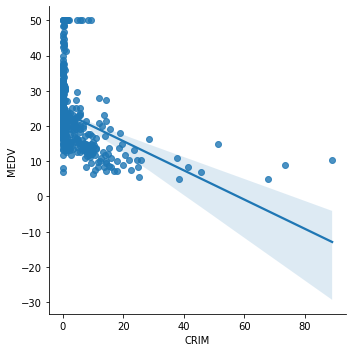

In [ ]:
# maintenant nous traçons CRIM (taux de criminalité par habitant par ville)
# vs la cible MEDV (valeur médiane de la maison)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

+ Les relations linéaires peuvent également être évaluées en évaluant les résidus. 

+ Les résidus sont la différence entre la valeur estimée par la relation linéaire et la production réelle. 

+ Si la relation est linéaire, les résidus devraient être normalement distribués et centrés autour de zéro.

Text(0, 0.5, 'Valeur réelle')

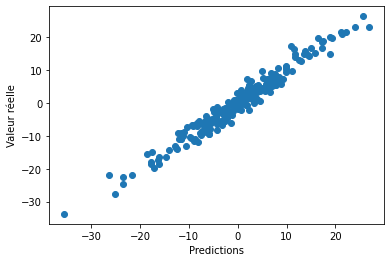

In [ ]:

# étape 1 : construction d'un modèle linéaire
# appeler le modèle linéaire de sklearn
linreg = LinearRegression()

# ajuster le modèle
linreg.fit(data['x'].to_frame(), data['y'])

# étape 2 : obtenir les prédictions
# faites les prédictions
pred = linreg.predict(data['x'].to_frame())

# étape 3 : calculer les résidus
error = data['y'] - pred

# tracer prédit vs réel
plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Valeur réelle')

Text(0.5, 0, 'Variable indépendante x')

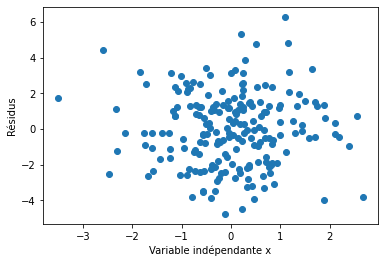

In [ ]:
# étape 4 : observer la distribution des résidus

# Residuals plot
# si la relation est linéaire, le bruit devrait être
# aléatoire, centré autour de zéro, et suivre une distribution normale.

# nous traçons les termes d'erreur par rapport à la variable indépendante x
# les valeurs d'erreur devraient être autour de 0 et distribuées de manière homogène

plt.scatter(y=error, x=data['x'])
plt.ylabel('Résidus')
plt.xlabel('Variable indépendante x')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Résidus')

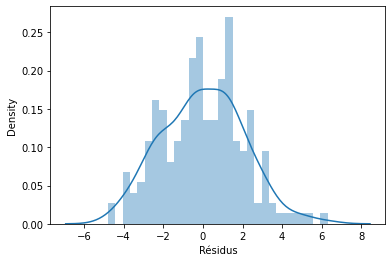

In [ ]:
# étape 5 : observer la distribution des erreurs

# Tracez un histogramme des résidus
# ils doivent suivre une distribution gaussienne
# centrée autour de 0

sns.distplot(error, bins=30)
plt.xlabel('Résidus')

Text(0, 0.5, 'MEDV')

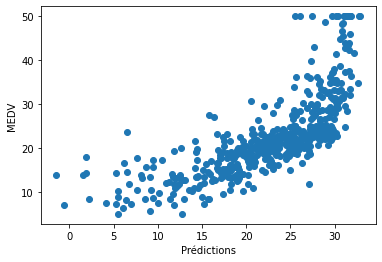

In [ ]:
# Maintenant, nous faisons la même chose pour la variable LSTAT de l'ensemble de données sur le prix des maisons à Boston.
# house price dataset from sklearn (données sur le prix des maisons)

# appelons le modèle linéaire de sklearn
linreg = LinearRegression()

# ajuster le modèle
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# faire les prédictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculez les résidus
error = boston['MEDV'] - pred

# Tracez les valeurs prédites par rapport aux valeurs réelles
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Prédictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

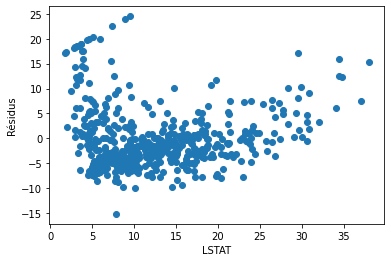

In [ ]:
# Residuals plot

# Si la relation est linéaire, le bruit devrait être
# aléatoire, centré autour de zéro, et suivre une distribution normale.

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Résidus')
plt.xlabel('LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


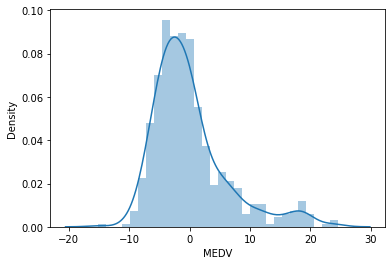

In [ ]:
# tracer un histogramme des résidus
# ils devraient suivre une distribution gaussienne
sns.distplot(error, bins=30)

+ Pour ce cas particulier, ***les résidus sont centrés autour de zéro, mais ils ne sont pas distribués de manière homogène entre les valeurs de LSTAT***. 

+ ***Des valeurs plus grandes et plus petites de LSTAT montrent des valeurs résiduelles plus élevées***. 

+ ***De plus, nous voyons dans l'histogramme que les résidus n'adoptent pas une distribution strictement gaussienne***.

##**Identifier une distribution normale**

+ Les modèles linéaires supposent que les variables indépendantes sont normalement distribuées. 

+ Dans cette recette, nous allons apprendre à évaluer les distributions normales des variables.

In [ ]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

In [ ]:
# Je vais créer un cadre de données avec la variable x qui
# suit une distribution normale 

# Cela fournira les graphiques attendus
# c'est-à-dire à quoi devraient ressembler les graphiques si l'hypothèse
# l'hypothèse est respectée

np.random.seed(29) # pour la reproductibilité

n = 200 # dans le livre, nous passons 200 entre parenthèses directement, sans définir n
x = np.random.randn(n)

data = pd.DataFrame([x]).T
data.columns = ['x']
data.head()

,x
0,-0.417482
1,0.706032
2,1.915985
3,-2.141755
4,0.719057


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


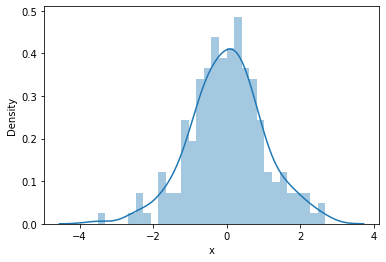

In [ ]:
# histogramme de la variable indépendante simulée x
# dont nous savons qu'elle suit une distribution gaussienne

sns.distplot(data['x'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


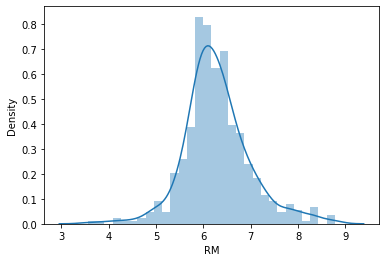

In [ ]:
# histogramme de la variable RM à partir de l'ensemble de données sur le prix des maisons à Boston.
# l'ensemble de données sur le prix des maisons de sklearn
# RM est le nombre moyen de pièces par logement

sns.distplot(boston['RM'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


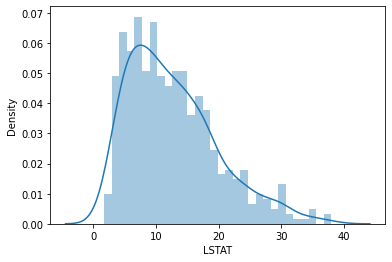

In [ ]:
# histogramme de la variable LSTAT
# (% de statut inférieur de la population)

sns.distplot(boston['LSTAT'], bins=30)

+ La normalité peut également être évaluée à l'aide de graphiques Q-Q. 

+ ***Dans un tracé Q-Q, on trace les quantiles de la variable sur l'axe des y et les quantiles attendus de la distribution normale sur l'axe des x.*** 

+ ***Si la variable suit une distribution normale, les points du tracé Q-Q devraient tomber sur une diagonale de 45 degrés, comme indiqué ci-dessous.***

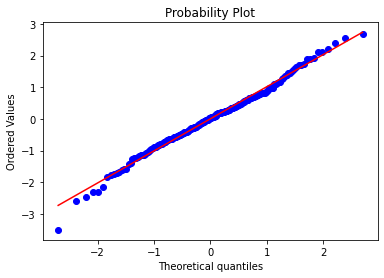

In [ ]:
# traçons le graphique Q-Q pour les données simulées.
# les points devraient s'ajuster à la ligne de 45 degrés

stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

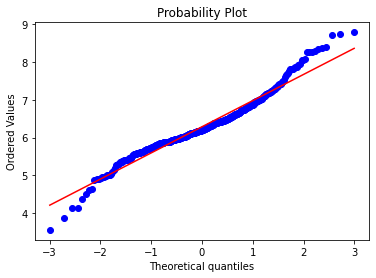

In [ ]:
# faisons la même chose pour RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

+ ***La plupart des observations de RM se situent sur la ligne de 45 degrés, ce qui suggère que la distribution est approximativement gaussienne, avec une certaine déviation vers les plus grandes et plus petites valeurs de la variable***.

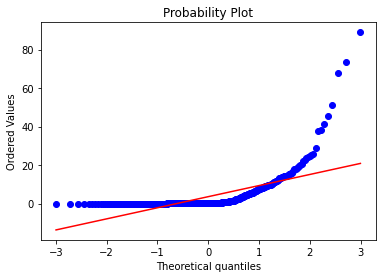

In [ ]:
# just for comparison, let's go ahead and plot CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

+ ***Le CRIM ne suit pas une distribution gaussienne, car la plupart de ses observations s'écartent de la ligne de 45 degrés dans le tracé Q-Q***.

##**Distribution des variables distinctives**

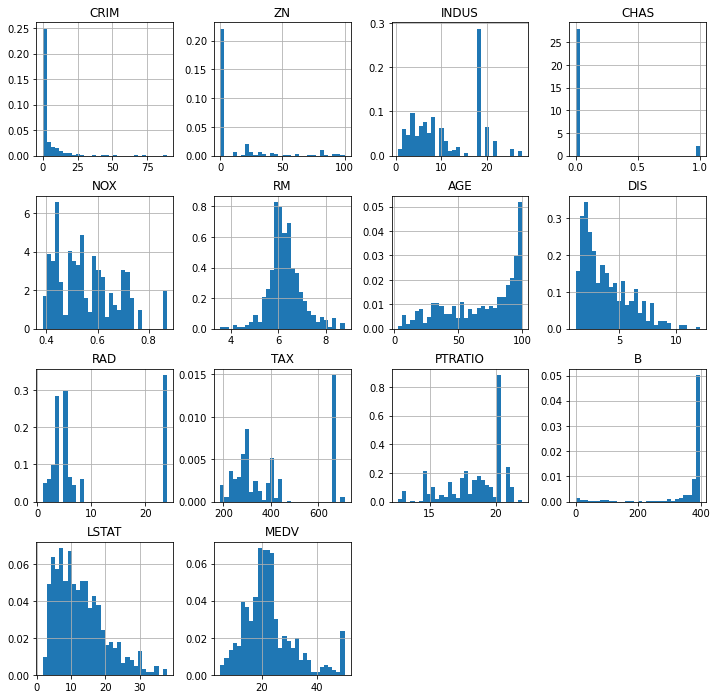

In [ ]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

##**Mise en évidence des valeurs aberrantes**

+ **Une valeur aberrante** est un point de données qui est significativement différent des autres données. 

+ **"Une observation aberrante** est une observation qui s'écarte tellement des autres observations qu'elle éveille les soupçons qu'elle a été générée par un mécanisme différent." [D. Hawkins, Identification of Outliers, Chapman and Hall , 1980].

+ Dans cette recette, **nous allons apprendre à identifier les valeurs aberrantes à l'aide de boxplots et de la règle de proximité de l'intervalle inter-quantile**.

+ Selon la règle de proximité de l'intervalle inter-quantile, une valeur est considérée comme aberrante si elle se situe en dehors des limites ci-dessous :

  + Limite supérieure = 75e quantile + (IQR * 1,5)

  + Limite inférieure = 25ème quantile - (IQR * 1,5)

+ où l'intervalle inter-quantile (IQR) est donné par :

  + IQR = 75e quantile - 25e quantile

In [ ]:
# Chargement des données sur le prix des maisons à Boston

# Chargement de l'ensemble de données de Boston depuis Sklearn
boston_dataset = load_boston()

# créez un cadre de données avec les variables indépendantes
# indiquées ci-dessous : 
# Je n'utiliserai que 3 des variables totales pour cette démonstration.

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


+ ***Dans le boxplot affiché ci-dessous, l'IQR est indiqué par la boîte, la médiane est indiquée par la ligne à l'intérieur de la boîte, les bords supérieur et inférieur de la boîte correspondent au 75ème et au 25ème quantile, et les moustaches marquent les limites de la règle de proximité comme décrit ci-dessus***. 
+ ***Les valeurs qui se situent en dehors des moustaches sont considérées comme des valeurs aberrantes.***

Text(0.5, 1.0, 'Boxplot')

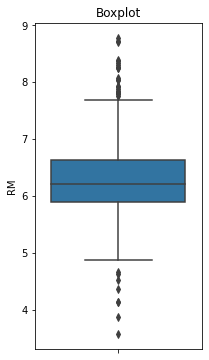

In [ ]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

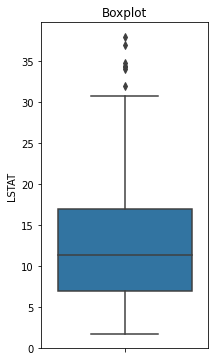

In [ ]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['LSTAT'])
plt.title('Boxplot')

In [ ]:
#la fonction trouve les limites supérieures et inférieures
# en utilisant la règle de proximité IQR


def find_boundaries(df, variable) :

    # la distance passée en argument, nous donne l'option de
    # d'estimer 1,5 fois ou 3 fois l'IQR pour calculer les limites.
    # les limites.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
# we find the boudaries for the variable RM

upper_boundary, lower_boundary = find_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [ ]:
# non trouvons dans un cadre de données ces valeurs aberrantes :

# la fonction trouve les limites supérieures et inférieures
# en utilisant la règle de proximité IQR

# Alternative, également présentée dans le livre
# Passer la distance comme argument de la fonction
# pour permettre la polyvalence

def find_boundaries(df, variable, distance) :

    # distance passée en argument, nous donne l'option de
    # d'estimer 1,5 fois ou 3 fois l'IQR pour calculer les
    # les limites.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# on trouve les boudoirs pour la variable RM

upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [ ]:
# let's flag the outliers in the data set

outliers = np.where(boston['RM'] > upper_boundary, True,
                    np.where(boston['RM'] < lower_boundary, True, False))

In [ ]:
# how many outliers did we find?
outliers.sum()

30

In [ ]:
# let's print a few of them

outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [ ]:
tmp = boston.loc[~outliers, 'RM']
#print("============ Shape of boston ===================")
#boston.shape
print("============ Shape of boston without boundaries===================")
tmp.shape

============ Shape of boston without boundaries===================


(476,)

##**Comparaison entre les caractéristiques et la magnitude**

+ De nombreux algorithmes d'apprentissage automatique sont sensibles à l'échelle des caractéristiques. 

+ Dans cette recette, nous allons apprendre à visualiser l'ampleur des caractéristiques et les métriques statistiques les plus courantes.

In [ ]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# let's have a look at the values of those variables
# to get an idea of the feature magnitudes

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


+ Dans le tableau, nous observons les principales statistiques des variables, par exemple, les quantiles 25, 50 et 75, la moyenne, l'écart-type et les valeurs minimale et maximale. 

+ En comparant ces paramètres, nous pouvons rapidement comprendre si nos caractéristiques sont dans une échelle similaire. 

+ Dans le cas présent, il est clair qu'elles ne le sont pas.

+ Le CRIM prend les valeurs 0-89 alors que le CHAS prend les valeurs 0 à 1, et le RM prend les valeurs 3,5 à 8,8.

In [ ]:
# let's now calculate the range of the variables

data.max() - data.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64

+ ***Les plages des variables, comme prévu, sont assez différentes.***